In [71]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot: xlabel='Sex', ylabel='count'>

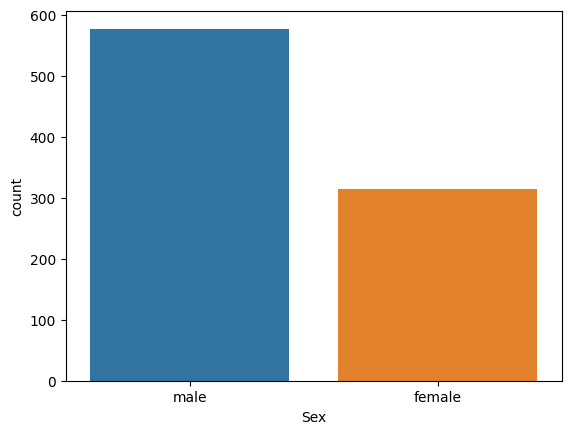

In [77]:
sns.countplot(x='Sex',data=train_df)

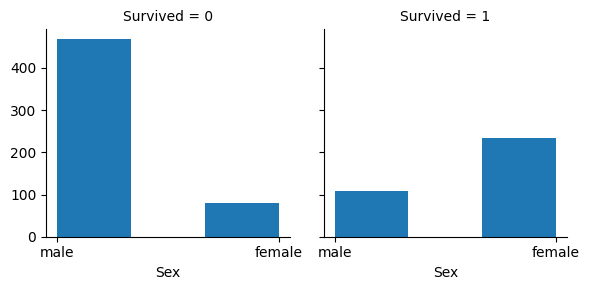

In [78]:
x = sns.FacetGrid(train_df, col='Survived')
x.map(plt.hist, 'Sex', bins=3)


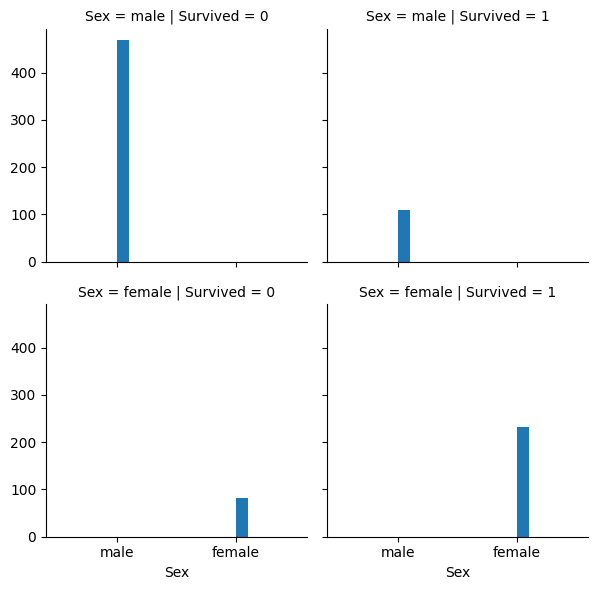

In [79]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex')
grid.map(plt.hist, 'Sex')
grid.add_legend();

In [38]:
# The data shows more number of men died than female so we can add this data to dataset

In [80]:
#droping the column that are unrelated
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [81]:
alldata = [train_df,test_df]
for data in alldata:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand = False)
print(data['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [82]:
for data in alldata:
     data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     data['Title'] = data['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     data['Title'] = data['Title'].replace('Mlle', 'Miss')
     data['Title'] = data['Title'].replace('Ms', 'Miss')
     data['Title'] = data['Title'].replace('Mme', 'Mrs')
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for data in alldata:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
print(data['Title'])

0      6
1      7
2      6
3      6
4      7
      ..
413    6
414    3
415    6
416    6
417    4
Name: Title, Length: 418, dtype: int64


In [83]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
alldata = [train_df, test_df]
for data in alldata:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [84]:
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64


In [85]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
ports = {"S": 0, "C": 1, "Q": 2}
for data in alldata:
    data['Embarked'] = data['Embarked'].map(ports)

In [86]:
for dataset in alldata:
    dataset['Age'] = dataset['Age'].fillna(train_df.Age.dropna().mean())
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [87]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [88]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,Y_train)
y_pred_gnb=GNB.predict(X_test)

print('accuracy is',round(GNB.score(X_train,Y_train)*100,2))

accuracy is 78.0
